In [3]:
import heapq
import collections
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def huffman_encode(text):
    # Count the frequency of each character in the input text
    freq = collections.Counter(text)

    # Build a binary tree of the characters and their frequencies
    heap = [[weight, [char, '']] for char, weight in freq.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

    # Generate the Huffman codes for each character
    huffman_codes = dict(sorted(heapq.heappop(heap)[1:], key=lambda x: (len(x[-1]), x)))
    return ''.join(huffman_codes[char] for char in text), huffman_codes

# Create a function to convert an image to a string
def image_to_string(image):
    image_1d = image.reshape(-1)
    image_ascii = [chr(i) for i in image_1d]
    string = ''.join(image_ascii)
    return string

# Example usage:
text = 'hello world'
encoded_text, huffman_codes = huffman_encode(text)

# Print character wise ASCII of the text
binary = [bin(ord(c))[2:-1] for c in text]
binary_val = ''.join(binary)
print(f'Binary representation of {text} is: {binary_val}, length: {len(binary_val)}')
print(f'Encoded text: {encoded_text}, length: {len(encoded_text)}')
print(f'Huffman codes: {huffman_codes}')


Binary representation of hello world is: 11010011001011011011011011011110000111011110111111001110110110010, length: 65
Encoded text: 11111110101000110001100010101101, length: 32
Huffman codes: {'l': '10', 'o': '00', 'r': '010', 'w': '011', ' ': '1100', 'd': '1101', 'e': '1110', 'h': '1111'}


Encoded string: 101010010110110011110110100110100011100011111001110111011010100011101101110011000101101101111111100111101011011010111100001000110110111101001101010010101110010100110010000101001001001101110101110001101001000110101010100101111000111101011100100000101110111011010101101000011111101010001010100100001001111011010101110001111101000100101001110000001010110110001000011010110101101111000110001001111101110101100111111111011000011011000001011111010100111111010111001110001011111111011111000111010101010001110000001001010110000011111000111101001100111011001101000100101110000110011101111101010100001010100010101001100111110110010110001110101011110001111010101110111100001110011111000011000011110111001100000110001101110110111111111110001100100111110010111010101000100101110101001000111111101011110101001011010111001001110101100000010001111010111001101111000000110000101111111110001101110010010011001001001111000011001000100111000010011100100010000011101101011001010001101110000001101111100111

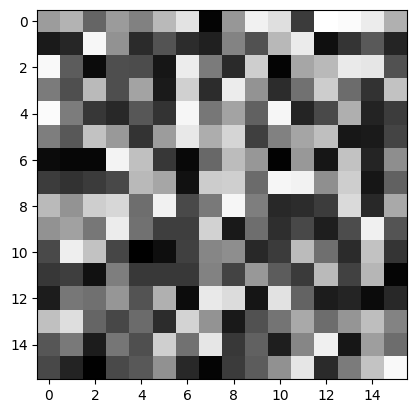

In [7]:
image = np.random.randint(0, 255, (16, 16))
string = image_to_string(image)
encoded_string, huffman_codes = huffman_encode(string)
print(f'Encoded string: {encoded_string}, \nlength: {len(encoded_string)}')

# Plot the image
plt.imshow(image, cmap='gray')
plt.show()


